# Training for Web Accessibility Models

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Reading the Dataset

In [114]:
df_train = pd.read_csv('./train_set.csv')
df_train['label'] = df_train['label'].apply(lambda x: '1' if x == 'accessible' else '0')
df_train['has_aria_main_role'] = df_train['has_aria_main_role'].apply(lambda x: 1 if x else 0)
df_train['has_aria_nav_role'] = df_train['has_aria_nav_role'].apply(lambda x: 1 if x else 0)
df_train['has_aria_banner_role'] = df_train['has_aria_banner_role'].apply(lambda x: 1 if x else 0)
df_train

,url,label,alt_text_percentage,aria_label_percentage,headings_without_roles,num_diff_link_phrase,aria_list_role_percentage,aria_link_role_percentage,has_aria_main_role,has_aria_nav_role,has_aria_banner_role
0,https://zorrolegend.blogspot.com/search/label/...,1,0.722222,0.000000,1.0,0.0,0.0,0.0,0,0,0
1,https://duke.edu/,1,1.000000,0.000000,1.0,0.0,0.0,0.0,0,0,1
2,https://uh.edu/,1,1.000000,0.051020,1.0,0.0,0.0,0.0,0,0,0
3,https://www.w3.org/,1,1.000000,0.000000,1.0,0.0,0.0,0.0,0,0,0
4,https://www.wright.edu/,0,0.740741,0.000000,1.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
102,https://www.youtube.com/watch?v=TqyfmFaZlqw,0,1.000000,0.000000,1.0,0.0,1.0,0.0,0,0,0
103,https://www.twitch.tv/,0,1.000000,1.000000,1.0,0.0,1.0,1.0,0,0,0
104,https://www.primevideo.com/offers/nonprimehome...,0,1.000000,0.000000,1.0,0.0,0.0,0.0,0,0,0
105,https://www.halfords.com/,0,0.947368,0.000000,1.0,0.0,0.0,0.0,1,0,1


In [115]:
X = df_train.loc[:, 'alt_text_percentage': 'has_aria_banner_role']
X

,alt_text_percentage,aria_label_percentage,headings_without_roles,num_diff_link_phrase,aria_list_role_percentage,aria_link_role_percentage,has_aria_main_role,has_aria_nav_role,has_aria_banner_role
0,0.722222,0.000000,1.0,0.0,0.0,0.0,0,0,0
1,1.000000,0.000000,1.0,0.0,0.0,0.0,0,0,1
2,1.000000,0.051020,1.0,0.0,0.0,0.0,0,0,0
3,1.000000,0.000000,1.0,0.0,0.0,0.0,0,0,0
4,0.740741,0.000000,1.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
102,1.000000,0.000000,1.0,0.0,1.0,0.0,0,0,0
103,1.000000,1.000000,1.0,0.0,1.0,1.0,0,0,0
104,1.000000,0.000000,1.0,0.0,0.0,0.0,0,0,0
105,0.947368,0.000000,1.0,0.0,0.0,0.0,1,0,1


In [116]:
y = df_train['label']
y

0      1
1      1
2      1
3      1
4      0
      ..
102    0
103    0
104    0
105    0
106    0
Name: label, Length: 107, dtype: object

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=1)

In [118]:
# training begins here
X_train = X
y_train = y

## Training all Models

In [119]:
models = [
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'SVM', 'model': SVC()},
    {'name': 'KNN', 'model': KNeighborsClassifier()},
    {'name': 'LogisticRegression', 'model': LogisticRegression()}
]

In [120]:
for m in models:
    model = m['model']
    name = m['name']
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    m['accuracy'] = accuracy_score(y_test, preds)
    print(f'for the {name} model:')
    print(classification_report(y_test ,preds))

for the Decision Tree model:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.75      0.86      0.80        14

    accuracy                           0.86        43
   macro avg       0.84      0.86      0.85        43
weighted avg       0.87      0.86      0.86        43

for the Naive Bayes model:
              precision    recall  f1-score   support

           0       0.90      0.31      0.46        29
           1       0.39      0.93      0.55        14

    accuracy                           0.51        43
   macro avg       0.65      0.62      0.51        43
weighted avg       0.74      0.51      0.49        43

for the Random Forest model:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        29
           1       0.67      1.00      0.80        14

    accuracy                           0.84        43
   macro avg       0.83      0.88      0.83

Decision Tree: 0.8604651162790697


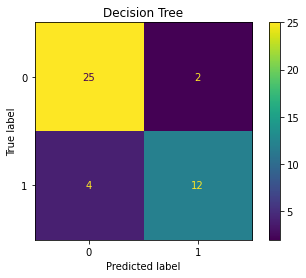

Naive Bayes: 0.5116279069767442


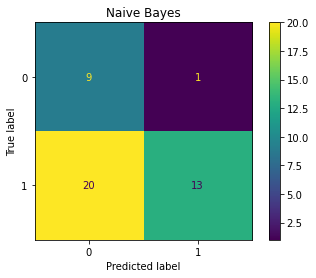

Random Forest: 0.8372093023255814


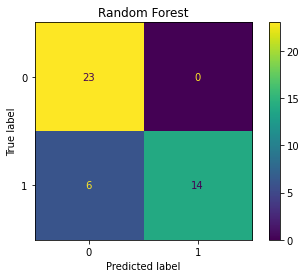

SVM: 0.627906976744186


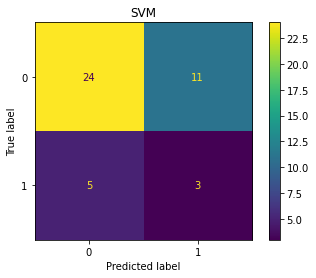

KNN: 0.6511627906976745


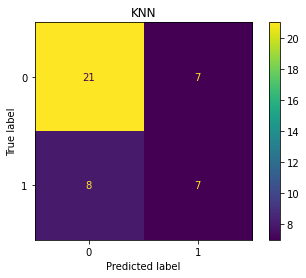

LogisticRegression: 0.627906976744186


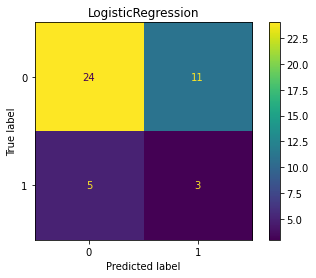

In [130]:
for m in models:
    print(f"{m['name']}: {m['accuracy']}")
    ConfusionMatrixDisplay.from_predictions(m['model'].predict(X_test), y_test)
    plt.title(m['name'])
    plt.show()

## Aggregate Ensemble Learning for the Best Performing Models

In [122]:
final_models = sorted(models, key=lambda x: x['accuracy'], reverse=True)
for m in final_models:
    print(f"{m['name']}: {m['accuracy']}")

Decision Tree: 0.8604651162790697
Random Forest: 0.8372093023255814
KNN: 0.6511627906976745
SVM: 0.627906976744186
LogisticRegression: 0.627906976744186
Naive Bayes: 0.5116279069767442


In [123]:
class BinaryAggregateEnsemble:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        preds = np.transpose(
            np.asarray(
                [model.predict(X) for model in self.models]
            )
        )
        return [str(int(pred.tolist().count('1') > pred.tolist().count('0'))) for pred in preds]

In [127]:
final_model = BinaryAggregateEnsemble([m['model'] for m in final_models[:3]])
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)
print(classification_report(final_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.86      0.75      0.80        16

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.86      0.86      0.86        43



In [131]:
accuracy_score(final_preds, y_test)

0.8604651162790697

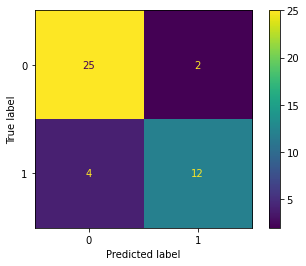

In [129]:
ConfusionMatrixDisplay.from_predictions(final_preds, y_test)
plt.show()